# Integrating the master equation, a.k.a spreading the butter

In [1]:
import numpy as np  # for numerics
import matplotlib.pyplot as plt # to make plots
import seaborn as sns # to make plots more appealing

sns.set(style="darkgrid") # Gray background with white grid
sns.set_context('talk') # Sets default size to the curves and fonts
# display plots next to code
%matplotlib inline 

### Define a function to integrate the master equation

In [3]:
def master_equation(prob, k, dt):
    '''
    Integrate the master equation for diffusion in 1D.
    
    Parameters
    ----------
    prob : 2D-array
        Array in which probabilities will be stored. This should be in the shape of N boxes by N time points.
        The first column must have the initial condition.
    k : float
        Jump rate of particles between boxes in 1/time units.
    dt : float
        Time step for our integration in the same units as 1/k.
        NOTE: This should be sufficiently smaller than 1/k.
        
    Returns
    -------
    prob : 2D-array
        The time evolution of the probability distribution.
    '''
    # Figure out the number of boxes and number of time steps
    num_boxes, time_points = np.shape(prob)
    
    # Loop through time points to integrate the master equation
    # NOTE: The first time point is already the initial condition
    for t in range(1, time_points):
        # Dealing with boundaries
        # Left boundary
        prob[0, t] = prob[0, t-1] + k * dt * prob[1, t-1] - k * dt * prob[0, t-1]
        
        # Right boundary
        prob[-1, t] = prob[-1, t-1] + k * dt * prob[-2, t-1] - k * dt * prob[-1, t-1]
        
        # Loop through the rest of the grid
        for box in range(1, num_boxes - 1):
            prob[box, t] = prob[box, t-1] + k * dt * prob[box-1, t-1] + k * dt * prob[box+1, t-1] - \
                            2 * k * dt * prob[box, t-1]
            
    return prob

In [4]:
# Define parameters for master equation
k = 5 # Jump frequency in 1 / sec
dt = 1 / (10 * k) # Time step sufficiently small
num_boxes = 80 # Number of boxes
time_steps = 100 # Total time of integration

### Now we are ready to integrate the master equation

In [6]:
# Initialise matrix prob
prob = np.zeros([num_boxes, time_steps])

# Set intial condition as delta function
initial_position = int(num_boxes / 2) - 1
prob[initial_position, 0] = 1

# Integrate the master equation
prob_int = master_equation(prob, k, dt)

### To see if it worked, let's plot different time points

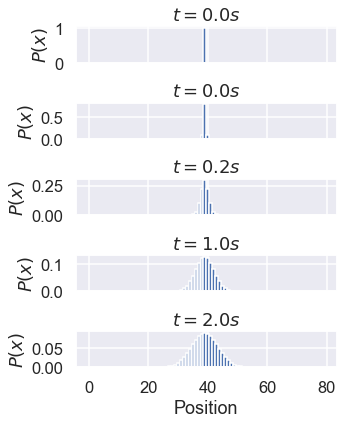

In [12]:
# Define time points to be plotted
time_plot = [0, 1, 10, 50, time_steps - 1]

# Initialise plot
fig, ax = plt.subplots(len(time_plot), 1, sharex=True,
                      figsize=(5,6))

# Loop through time points
for i, t in enumerate(time_plot):
    ax[i].bar(range(prob.shape[0]), prob[:, t])
    
    # Set title woth time point
    ax[i].set_title(r'$t = {:.1f} s$'.format(t * dt))
    ax[i].set_ylabel(r'$P(x)$')
    
ax[-1].set_xlabel('Position')
plt.tight_layout()